#### Information about samples: the data I am using in this example is published and can be find here: https://zenodo.org/records/6578617
#### the paper: https://www.nature.com/articles/s41586-022-05060-x
##### CK158 - control P1 (healthy heart zone)
##### CK159 - RZ/BZ P5 (remote / border heart zone)
##### CK361 - IZ P 10 (ischaemic heart zone)

In [1]:
import scanpy as sc
import scanpy.external as sce
import pandas as pd

In [65]:
adata = sc.read_h5ad('/Users/danomics/Desktop/Scanpy_analysis/Harmony/filtered_data/concat_filtered_3_samples.h5ad')
adata

/Users/danomics/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 26193 × 13157
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'batch', 'condition'
    layers: 'raw_counts'

# Harmony

In [66]:
# run normalization and dimensionality reduction 

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, batch_key = 'batch', subset=False)
sc.pp.scale(adata)
sc.pp.pca(adata, use_highly_variable=True)


/Users/danomics/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:377: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [67]:
adata.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,outlier,mt_outlier,doublet_score,predicted_doublet,batch,condition
AAACCCACAAAGGAGA-1,1679,1667,7.419381,2587.0,7.858641,14.418245,3.0,1.386294,0.115964,False,False,0.010155,False,CK158,control
AAACCCACAGAGATGC-1,4190,4170,8.335911,12986.0,9.471704,31.018019,7.0,2.079442,0.053904,False,False,0.145194,False,CK158,control
AAACCCACATCGGATT-1,7048,6993,8.852808,25756.0,10.156462,22.666563,43.0,3.784190,0.166951,False,False,0.267951,False,CK158,control
AAACCCAGTAACGGTG-1,2702,2692,7.898411,6357.0,8.757469,28.346704,3.0,1.386294,0.047192,False,False,0.034132,False,CK158,control
AAACCCAGTCCAGAAG-1,519,515,6.246107,623.0,6.436151,18.780096,0.0,0.000000,0.000000,False,False,0.012754,False,CK158,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCCATGGG-1,780,762,6.637258,925.0,6.830874,13.729730,1.0,0.693147,0.108108,False,False,0.355932,False,CK361,ischaemic zone
TTTGGTTTCCGAAGGA-1,562,554,6.318968,657.0,6.489205,13.242009,0.0,0.000000,0.000000,False,False,0.142857,False,CK361,ischaemic zone
TTTGTTGTCCAATGCA-1,748,730,6.594413,901.0,6.804615,11.431743,1.0,0.693147,0.110988,False,False,0.074842,False,CK361,ischaemic zone
TTTGTTGTCGTGTTCC-1,711,700,6.552508,840.0,6.734591,11.904762,1.0,0.693147,0.119048,False,False,0.071553,False,CK361,ischaemic zone


In [68]:
# run batch effect correction or also known as integration 
# pip install harmonypy has to be installed for this step

sce.pp.harmony_integrate(adata, key = 'batch')

2025-05-25 21:44:46,707 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-25 21:44:48,571 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-25 21:44:48,624 - harmonypy - INFO - Iteration 1 of 10
2025-05-25 21:44:52,850 - harmonypy - INFO - Iteration 2 of 10
2025-05-25 21:44:56,778 - harmonypy - INFO - Iteration 3 of 10
2025-05-25 21:45:00,706 - harmonypy - INFO - Iteration 4 of 10
2025-05-25 21:45:04,366 - harmonypy - INFO - Iteration 5 of 10
2025-05-25 21:45:07,622 - harmonypy - INFO - Iteration 6 of 10
2025-05-25 21:45:09,272 - harmonypy - INFO - Iteration 7 of 10
2025-05-25 21:45:11,157 - harmonypy - INFO - Iteration 8 of 10
2025-05-25 21:45:12,819 - harmonypy - INFO - Iteration 9 of 10
2025-05-25 21:45:14,675 - harmonypy - INFO - Iteration 10 of 10
2025-05-25 21:45:16,179 - harmonypy - INFO - Stopped before convergence


In [69]:
sc.pp.neighbors(adata, use_rep = "X_pca_harmony") # use new embedding

In [70]:
sc.tl.umap(adata)

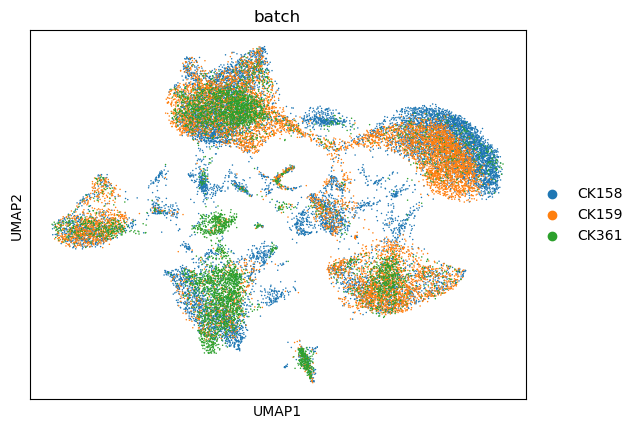

In [71]:
# visualize the results of the integration using UMAP 
sc.pl.umap(adata, color = 'batch')

# Clustering

In [72]:
# clustering using 0.5 resolution (usually the more cells there are the higher resolution should be)
sc.tl.leiden(adata, resolution =  0.2)

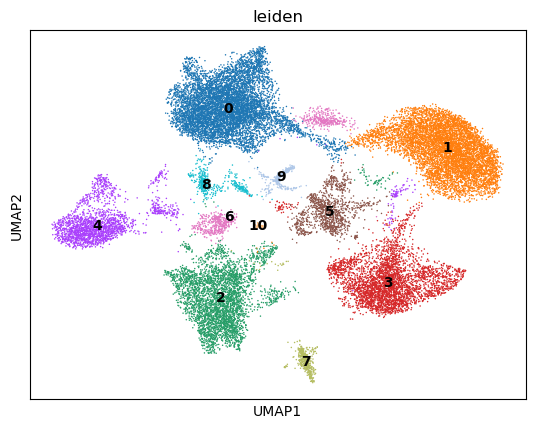

In [73]:
sc.pl.umap(adata, color = 'leiden', legend_loc = 'on data')

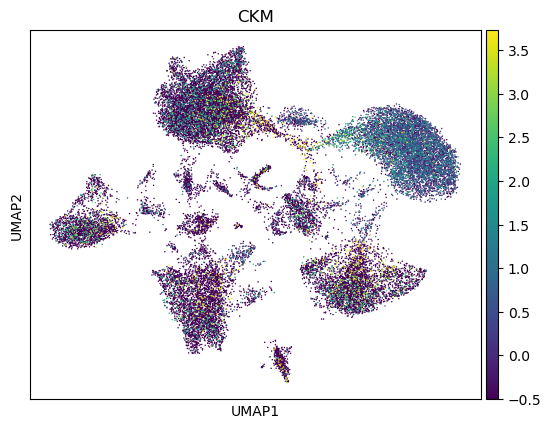

In [74]:
sc.pl.umap(adata, color = ['CKM'], vmax='p99') # CM gene should be only in caridomyocytes --> there are still some doublets

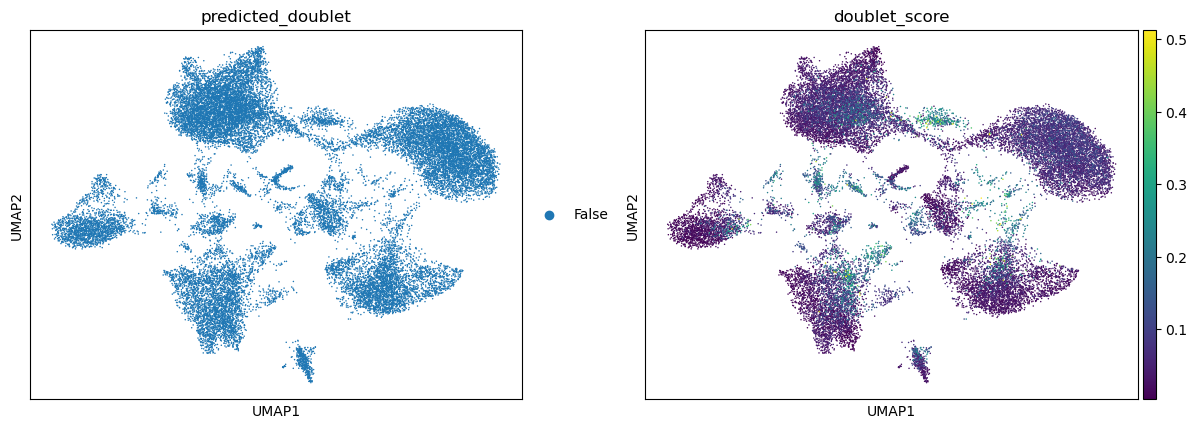

In [75]:
sc.pl.umap(adata, color = ['predicted_doublet','doublet_score']) # also shows False it depends on the threshold, which by default is 0.5

In [76]:
# because we have the values as a column in the obs df here I can just change the threshold to 0.1 and filter out everything that is higher 
# than that value
adata = adata[adata.obs['doublet_score'] <= 0.1].copy()

/Users/danomics/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


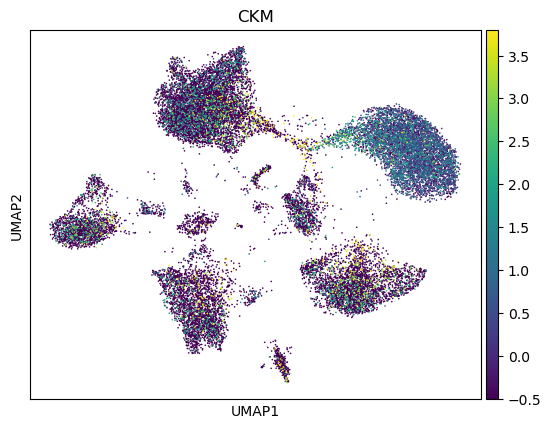

In [77]:
sc.pl.umap(adata, color = ['CKM'],vmax="p99") # slightly batter

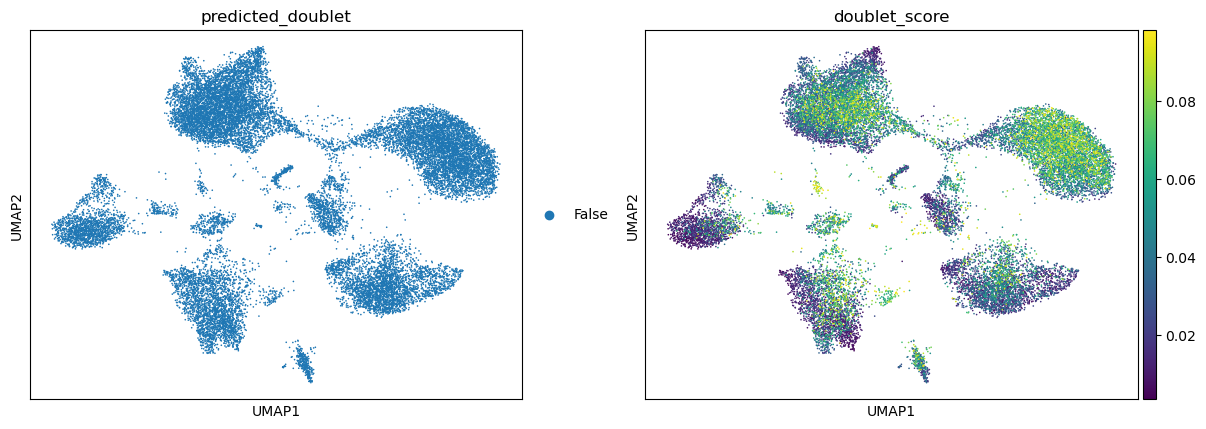

In [78]:
sc.pl.umap(adata, color = ['predicted_doublet','doublet_score'])

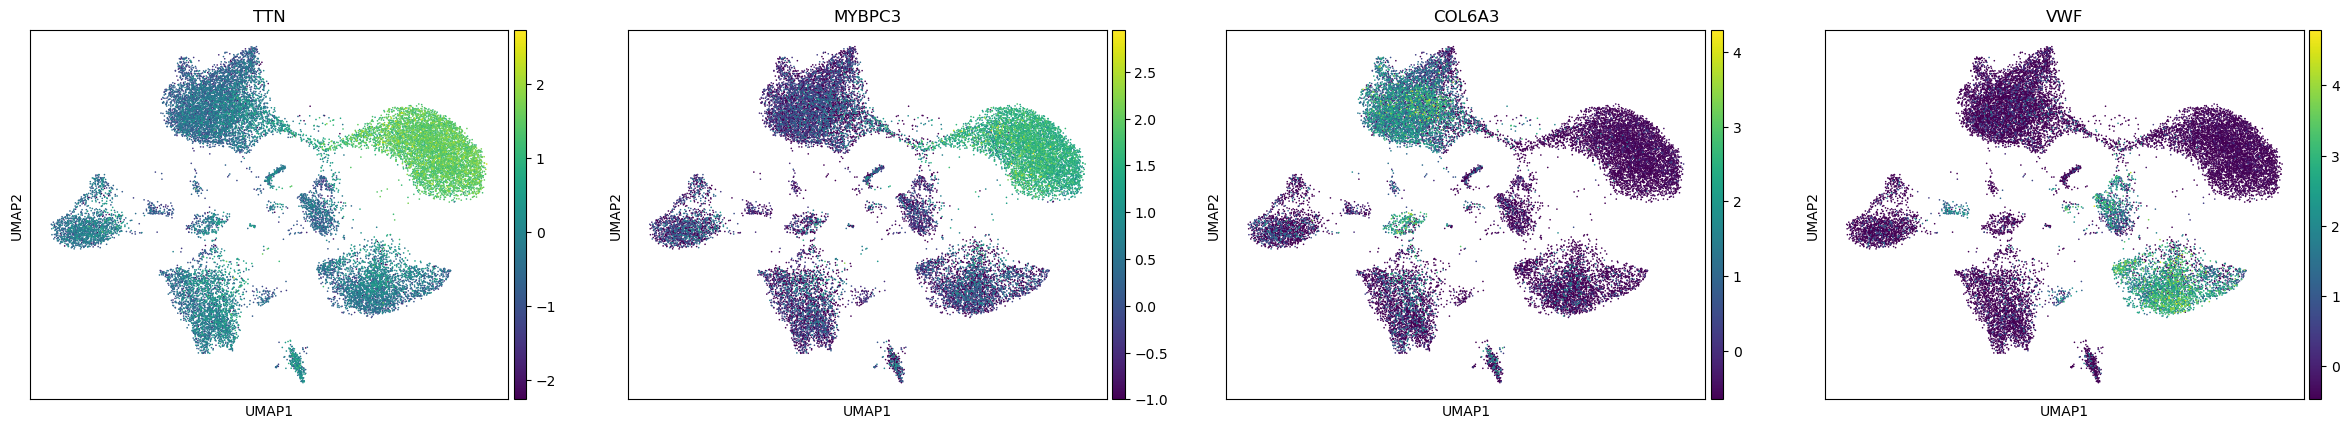

In [79]:
sc.pl.umap(adata, color = ['TTN','MYBPC3','COL6A3','VWF']) # plot some marker genes: TTN and MYBPC3 - CMs,  COL6A3 - Fib, VWF - Endo

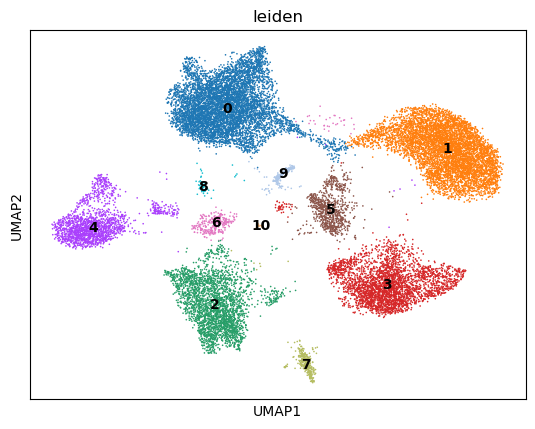

In [80]:
sc.pl.umap(adata, color = 'leiden', legend_loc = 'on data')

In [81]:
# Rank genes for characterizing groups in this case leiden clustering
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon') # Differential gene expression or DGE analysis
top_markers = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20) # create a df of top 20 differentially expressed genes

/Users/danomics/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/danomics/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/danomics/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/danomics/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/danomics/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2

In [82]:
# visialise top 20 differentially expressed genes
# based on them I will perform manual cell type annotation
top_markers

,0,1,2,3,4,5,6,7,8,9,10
0,NEGR1,TTN,RBM47,VWF,DLC1,LDB2,COL6A3,SKAP1,SLC9A9,NRXN1,SLC24A3
1,RORA,RYR2,RBPJ,PTPRM,NR2F2-AS1,PKHD1L1,FN1,PTPRC,F13A1,NRXN3,NTM
2,BICC1,MYBPC3,F13A1,ST6GALNAC3,EPS8,LINC02388,GPC6,CCND3,FRMD4B,ADGRB3,P2RX1
3,CDH19,LDB3,MRC1,FLT1,CARMN,GMDS,COL3A1,ARHGAP15,ZEB2,KIRREL3,DOCK10
4,ABCA6,SORBS2,FRMD4B,LDB2,FRMD3,EMCN,PDGFRA,CHST11,EPB41L3,ANK3,IL18R1
5,DCN,FHL2,IQGAP2,ANO2,PLA2G5,LINC02147,COL1A2,ANKRD44,COLEC12,CADM2,GRAP2
6,COL6A3,RBM20,FMN1,PITPNC1,EGFLAM,ST6GALNAC3,PLCG2,BCL2,MRC1,CDH19,PDE7B
7,AC011246.1,CTNNA3,CTSB,PIK3R3,PDZD2,TMEM132C,COL6A1,CD247,MS4A6A,XKR4,SMYD3
8,SCN7A,DMD,TBXAS1,PTPRB,PRKG1,ADAMTSL1,COL5A1,RIPOR2,RBM47,SORCS1,ALOX5
9,ABCA8,CACNB2,STAB1,TACC1,PDGFRB,CDH11,KAZN,CARD11,LGMN,DST,TRIO


In [83]:
top_markers['0']

0          NEGR1
1           RORA
2          BICC1
3          CDH19
4          ABCA6
5            DCN
6         COL6A3
7     AC011246.1
8          SCN7A
9          ABCA8
10         LAMA2
11          FBN1
12        COL4A4
13          MEG3
14          EBF2
15          PID1
16         LAMB1
17         GLIS3
18          EBF1
19         RBMS3
Name: 0, dtype: object

# https://cellxgene.cziscience.com/gene-expression database that helps with manual cell type annotation one can find which genes are the most expressed in which cell type

In [84]:
# map manually annotated cell types to the clusters 

cell_type_dict = {'0':'Fibroblasts',
            '1':'Cardiomyocytes',
            '2':'Immune cells', # Macrophage/Monocyte Markers 
            '3': 'Endothelial cells', 
            '4': 'Fibroblasts',
            '5': 'Endothelial cells', 
            '6': 'Fibroblasts', # Extracellular Matrix Markers
            '7': 'Immune cells', # T cells
            '8': 'Immune cells', # Macrophage/Monocyte Markers
            '9': 'Neuronal cells', # Specialized cardiac conduction cells
            '10': 'Immune cells', # Lymphocyte Markers (T cells, NK cells, some myeloid cells)
             }

adata.obs['cell_types'] = adata.obs['leiden'].map(cell_type_dict)

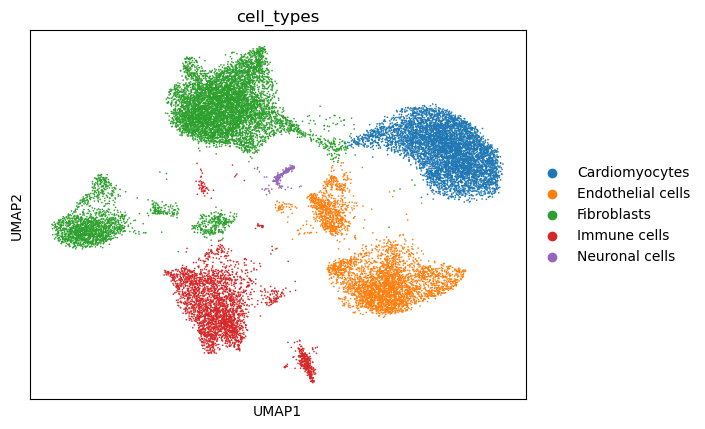

In [85]:
sc.pl.umap(adata, color=['cell_types'], legend_loc='right margin')

In [86]:
adata.write('integrated_3_samples.h5ad')